K-nearest neighbors (KNN) is a supervised classification algorithm. 

Reference: https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
        
<img src="knn1.png">

Explanation of KNN

From the figure, we notice that there are two classes: Class A (red stars) and Class B (green triangles).

Our new point is the yellow square with a question mark.

Find distance between the new point and every other point in the dataset. 

Example: 

distance - 0.4, 0.49, 0.9, 1.5,...
class    - A,    B,   A,    B, ...


k = 1, find one neighbor the new point is closest to. In this case, it looks like the new point is close to Class A.

k = 2, find two neighbors that are closest to the new point. It is a tie. 

k = 3, two closests belong to Class A and one belongs to Class B, so the new point belongs to class A. 

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
import numpy

iris_np = numpy.array(iris)

In [4]:
print(iris_np.shape)

()


In [5]:
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [6]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
print(type(iris.data), type(iris.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
print(iris.data.shape)

(150, 4)


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state=42)

In [12]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [14]:
"""
We are fitting models for different values of k. We are then finding accuracy for each model 
and storing it in scores_list.
"""
k_range = range(1, 10)
#scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    #scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Test Accuracy')

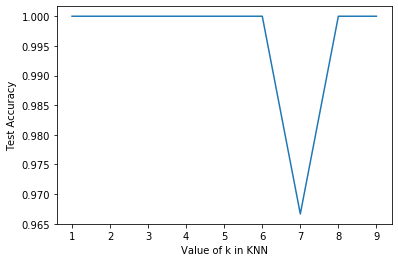

In [15]:
# We are plotting accuracy for different values of k
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)
plt.xlabel("Value of k in KNN")
plt.ylabel("Test Accuracy")

In [16]:
# from the above plot, we can say that k=5 gives the best accuracy

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

classes = {0:"setosa", 1:"versicolor", 2:"virginica"}
import numpy as np

# we are giving two new set of points and we want our classifier to classify them.

x_new = [[3, 4, 5, 2],[5, 4, 2, 2],[3,1,1,1]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])
print(classes[y_predict[2]])

versicolor
setosa
setosa


In [31]:
x_new = [[3, 4, 5, 2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])

versicolor


In [32]:
# Since the model will always make a prediction, even if we blow up the values, we get a class

x_new = [[300, 400, 500, 200]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])

virginica
